In [26]:
from abc import ABC, abstractmethod
import pandas as pd
import os
path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))+r"\Repositories\Python_Tutorial\data"
class Artikel(ABC):
    @abstractmethod
    def __init__(self,verkäufe):
        self.verkäufe = verkäufe
    @abstractmethod
    def getPreis(self):
        pass

class CD(Artikel):
    def __init__(self,bands,verkäufe,gründung):
        self.bands = bands
        Artikel.__init__(self,verkäufe)
        self.gründung = gründung
        self.preis = 10 #Klassenvariable
    def getPreis(self):
        return self.preis
    
class Auto(Artikel):
    def __init__(self,modell,baujahr,verkäufe):
        self.modell = modell
        self.baujahr = baujahr
        Artikel.__init__(self,verkäufe)
        self.preis = 450 #Klassenvariable
    def getPreis(self):
        return self.preis

class Artikelliste:
    
    def __init__(self):
        self.liste = []
    def artikel_hinzufügen(self,artikel):
        self.liste.append(artikel)
    def CD_liste_einlesen(self):
        df = pd.read_csv(path+r"\Musik1.csv", delimiter=",", encoding='latin-1')
        for i in range(0,len(df)):
            x = CD(df.iat[i,0],df.iat[i,1],df.iat[i,2])
            self.artikel_hinzufügen(x)   
    def Auto_liste_einlesen(self):
        df = pd.read_csv(path+"\mtcars2.csv", delimiter=";", encoding='latin-1')
        for i in range(0,len(df)):
            self.artikel_hinzufügen(Auto(df.iat[i,0],df.iat[i,1],df.iat[i,2]))
    def summe(self):
        summe = 0
        for artikel in self.liste:
            summe = summe + artikel.preis
        return summe
    def getEintrag(self,index):
        return self.liste[index]     

class Lager:
    def __init__(self):
        artikelliste = Artikelliste()
        artikelliste.CD_liste_einlesen()
        artikelliste.Auto_liste_einlesen()
        self.lagerliste = artikelliste
    def artikel_verfügbar(self,artikel):
        if artikel in self.lagerliste.liste:
            return True
        else:
            return False
    def artikel_löschen(self,artikel):
        if Lager.artikel_verfügbar(self,artikel):
            self.lagerliste.liste.remove(artikel)
        else:
            print("Dieser Artikel ist leider nicht vorrätig")
    def getObjektanzahl(self):
        return len(self.lagerliste.liste)
    def getLagerwert(self):
        return self.lagerliste.summe()

class Person:
    def __init__(self, name, geburtsdatum, land):
        self.name = name
        self.geburtsdatum = geburtsdatum
        self.land = land
        
class Mitarbeiter(Person):
    def __init__(self,name,geburtsdatum,land,größe):
        Person.__init__(self,name,geburtsdatum,land)
        self.größe = größe
    def bearbeite_auftrag(self,artikelliste,lager):
        for artikel in artikelliste.liste:
            lager.artikel_löschen(artikel)
    def getName(self):
        return self.name
    
class Kunde(Person):
    def __init__(self,name,geburtsdatum,land):
        Person.__init__(self,name,geburtsdatum,land)
        self.kontostand = 1000 #jeder Kunde zu Beginn 1000€
    def kaufen(self,*args):
        if len(args)==3:
            self.kaufen1(args[0],args[1],args[2])
        elif len(args) == 4:
            self.kaufen2(args[0],args[1],args[2],args[3])
        else:
            print("Falsche Eingabe 1")
    def kaufen1(self,lager,artikelliste,mitarbeiter):
        mitarbeiter.bearbeite_auftrag(artikelliste,lager)
        self.kontostand = self.kontostand - artikelliste.summe()
    def kaufen2(self,lager, artikelliste,mitarbeiter,gutscheincode):
        if (gutscheincode == "GutscheinA"):
            self.kontostand += 100
            self.kaufen1(artikelliste,mitarbeiter)
        elif (gutscheincode == "GutscheinB"):
            mitarbeiter.bearbeite_auftrag(artikelliste,lager)
            self.kontostand = self.kontostand - artikelliste.summe()*0.5
        else:
            print("Falsche Eingabe 2")
    def getName(self):
        return self.name
            
class Personenliste:
    
    def __init__(self):
        self.liste = []
    def person_hinzufügen(self,person):
        self.liste.append(person)
    def Mitarbeiter_liste_einlesen(self):
        df = pd.read_csv(path+"\Personen2.csv", delimiter=";", encoding='latin-1')
        for i in range(0,len(df)):
            self.person_hinzufügen(Mitarbeiter(df.iat[i,0],df.iat[i,3],df.iat[i,1],df.iat[i,2]))
    def Kunden_liste_einlesen(self):
        df = pd.read_csv(path+"\Kunden.csv", delimiter=";", encoding='latin-1')
        for i in range(0,len(df)):
            self.person_hinzufügen(Kunde(df.iat[i,0],df.iat[i,1],df.iat[i,2]))
    def getEintrag(self,index):
        return self.liste[index]

In [27]:
from datetime import date

if __name__ == "__main__":
    lager = Lager()
    print(lager.getObjektanzahl())
    print(lager.getLagerwert())
    kunde1 = Kunde("Peter",date(1985,9,3),"Deutschland")
    mitarbeiter1 = Mitarbeiter("Markus",date(1997,12,12),"Russland",1.92)
    
    einkauf_kunde1 = Artikelliste()
    einkauf_kunde1.artikel_hinzufügen(CD("ABC",234567,date(1990,8,3)))
    einkauf_kunde1.artikel_hinzufügen(Auto("XYZ",date(1990,8,3),1234))
    lager.lagerliste.getEintrag(5).preis = 120 
    einkauf_kunde1.artikel_hinzufügen(lager.lagerliste.getEintrag(10))
    kunde1.kaufen(lager,einkauf_kunde1,mitarbeiter1,"GutscheinB")
    print(kunde1.kontostand)
    
    print(lager.getObjektanzahl())
    print(lager.getLagerwert())
    
    mitarbeiterliste = Personenliste()
    mitarbeiterliste.Mitarbeiter_liste_einlesen()
    mitarbeiterliste.person_hinzufügen(Mitarbeiter("Ingo",date(1993, 12, 14),"Deutschland",1.76))
    print(mitarbeiterliste.getEintrag(1).getName())
    
    kundenliste = Personenliste()
    kundenliste.Kunden_liste_einlesen()
    kundenliste.person_hinzufügen(Kunde("Lisa",date(1996,7,4),"Italien"))
    print(kundenliste.getEintrag(1).getName())

68
28840
Dieser Artikel ist leider nicht vorrätig
Dieser Artikel ist leider nicht vorrätig
545.0
67
28060
Moritz
Kunde_2


## mögliche grafische Darstellungen (nicht gefordert):

            Bands  Verkäufe    Gründung
0       Motörhead    206203  1974-07-20
1     Linkin Park    248849  1994-11-22
2  Helene Fischer    329140  1994-05-15
3     Udo Jürgens    463281  1994-12-07


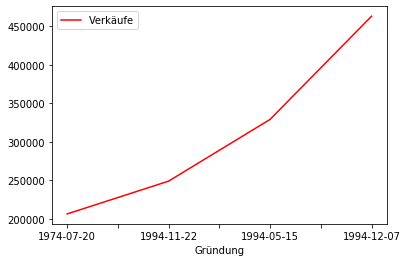

In [28]:
import matplotlib.pyplot as plt
path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))+r"\Repositories\Python_Tutorial\data"
df = pd.read_csv(path+"\Musik1.csv", delimiter=",", encoding='latin-1')
print(df)
df.plot(y='Verkäufe',x='Gründung',color='red')
plt.show()

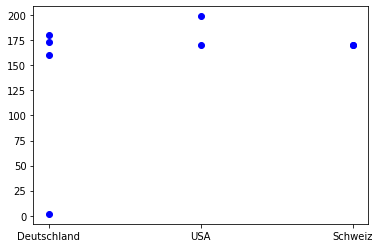

In [29]:
from datetime import date

liste = mitarbeiterliste.liste
plt.plot(*zip(*[(m.land, m.größe) for m in liste]),"bo")
plt.show()